# setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Data
First, let's create some toy datasets...

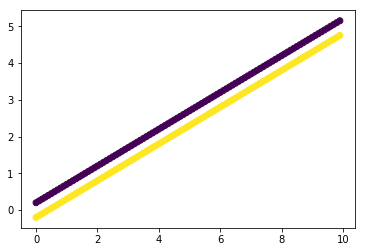

In [2]:
def lines(slope=0.5, offset=0.2, start=0,stop=10,step=0.1):
    X = np.array([[x,x*slope-offset] for x in np.arange(start,stop,step)] + [[x,x*slope+offset] for x in np.arange(start,stop,step)])
    y = np.array([1 for i in np.arange(start,stop,step)] + [0 for i in np.arange(start,stop,step)])
    return X,y


X,y = lines()
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

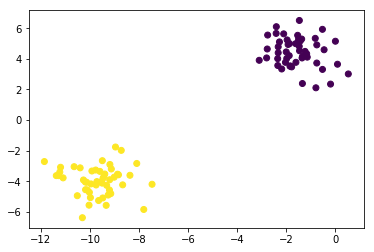

In [3]:
from sklearn.datasets.samples_generator import make_blobs

X_blobs,y_blobs = make_blobs(centers=2,random_state=1)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=y_blobs)
plt.show()

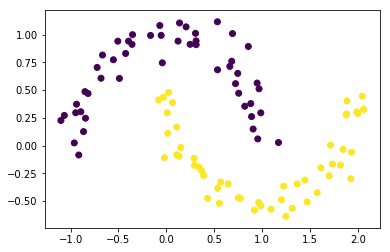

In [4]:
from sklearn.datasets.samples_generator import make_moons

X_moons,y_moons = make_moons(n_samples=100,noise=0.1,random_state=0)
plt.scatter(X_moons[:,0],X_moons[:,1],c=y_moons)
plt.show()

## Helper function to plot a decision boundary.

In [5]:
def plot_decision_boundary(pred_func, X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## Helper function to train, report accuracy and plot decision boundary

In [6]:
from sklearn.metrics import precision_score, recall_score

def train_report(classifier,X,y):
    classifier.fit(X, y)
    print("accuracy:",clf.score(X,y)) # classification accuracy

    # Plot the decision boundary
    plot_decision_boundary(lambda x: clf.predict(x),X,y)
    plt.show()

# Classifiers
## Logistic Regression

accuracy: 1.0


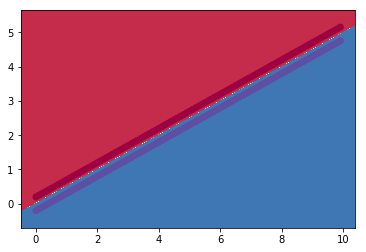

In [7]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression classifier
clf = LogisticRegression()
train_report(clf,X,y)

accuracy: 0.86


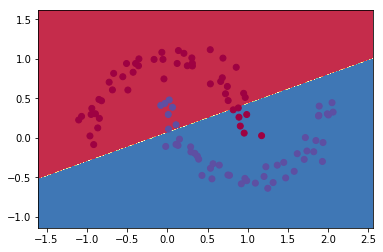

In [8]:
train_report(clf,X_moons,y_moons)

accuracy: 1.0


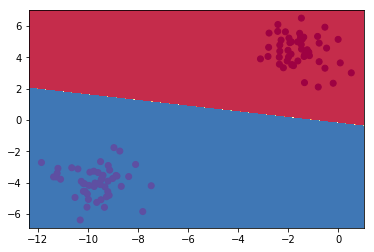

In [9]:
train_report(clf,X_blobs,y_blobs)

## Support Vector Machine (SVM)

accuracy: 1.0


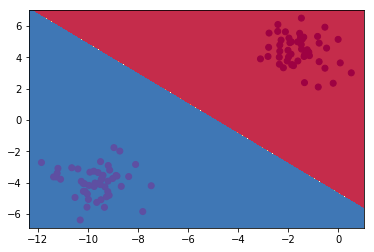

In [10]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

train_report(clf,X_blobs,y_blobs)

accuracy: 1.0


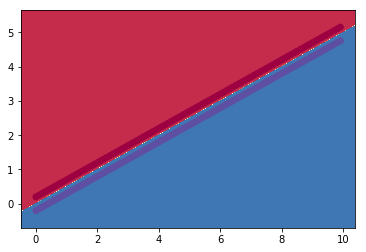

In [11]:
train_report(clf,X,y)

accuracy: 0.87


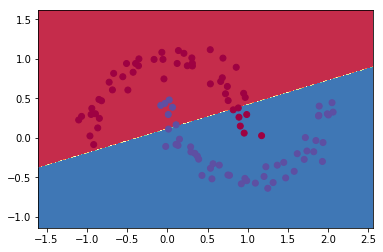

In [12]:
train_report(clf,X_moons,y_moons)

accuracy: 0.94


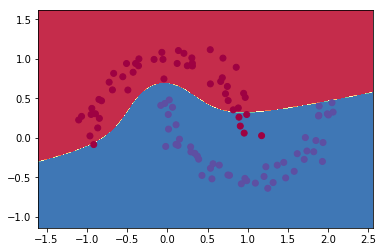

In [13]:
clf = svm.SVC(kernel='poly', degree=3, gamma=2)

train_report(clf,X_moons,y_moons)

accuracy: 0.94


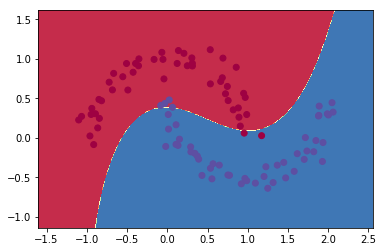

In [14]:
clf = svm.SVC(kernel='rbf')

train_report(clf,X_moons,y_moons)

## Decision Trees

accuracy: 1.0


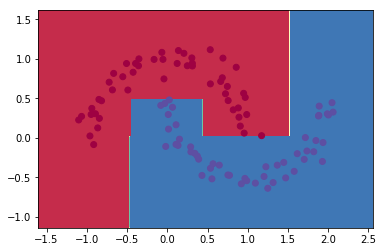

In [15]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

train_report(clf,X_moons,y_moons)

Next cell requires installation of [Graphviz](https://www.graphviz.org/)

Can be installed via  
`conda install python-graphviz`

/bin/sh: 1: dot: not found


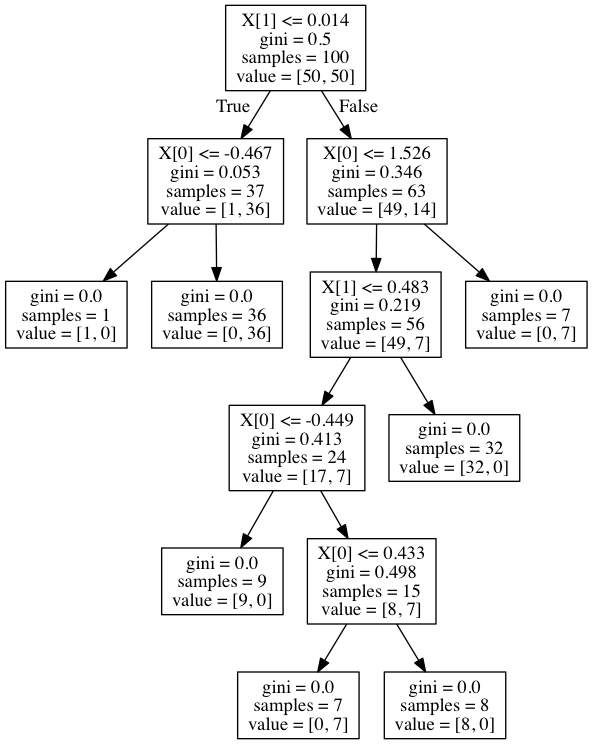

In [16]:
from IPython.display import Image

tree.export_graphviz(clf,out_file='dt.dot')

!dot -Tpng dt.dot -o dt.png
Image("dt.png")

accuracy: 1.0


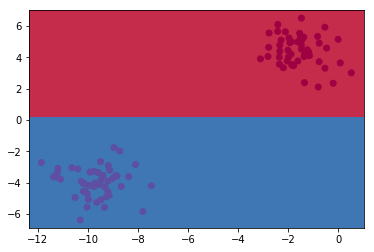

In [17]:
train_report(clf,X_blobs,y_blobs)

accuracy: 1.0


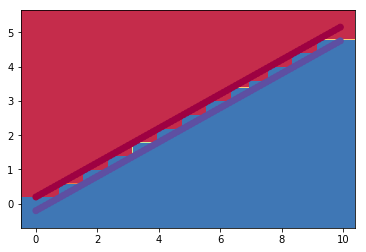

In [18]:
train_report(clf,X,y)

/bin/sh: 1: dot: not found


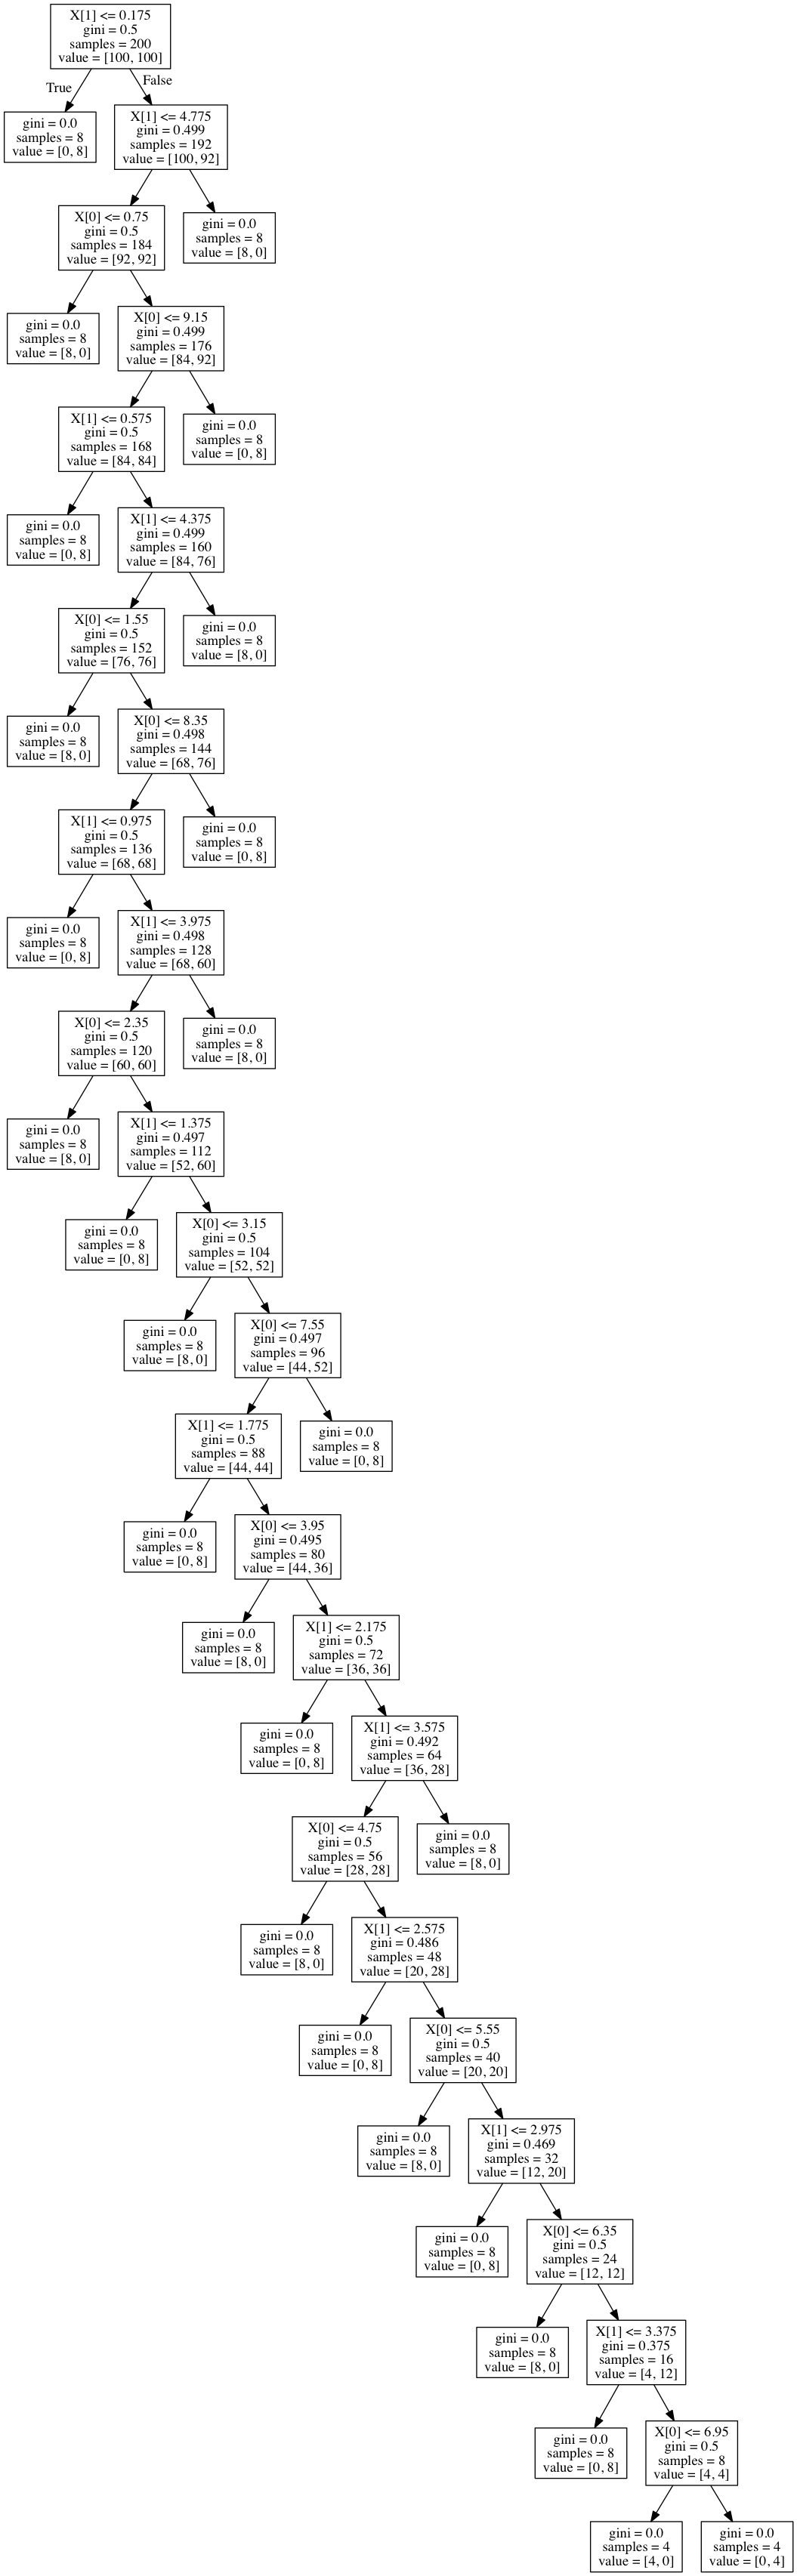

In [19]:
tree.export_graphviz(clf,out_file='dt2.dot')

!dot -Tpng dt2.dot -o dt2.png
Image("dt2.png")

### Ensemble - Random Forest

accuracy: 1.0


/media/data/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


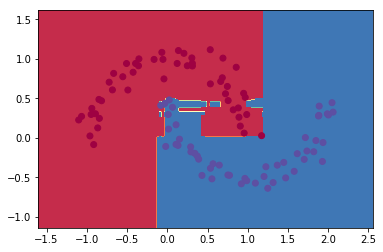

In [20]:
from sklearn.ensemble import RandomForestClassifier as RF

clf = RF()

train_report(clf,X_moons,y_moons)

## K-Nearest Neighbors - KNN

accuracy: 1.0


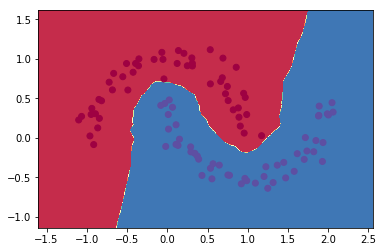

In [21]:
from sklearn.neighbors import KNeighborsClassifier as KNN

clf = KNN()

train_report(clf,X_moons,y_moons)

## Naive Bayes

accuracy: 0.88


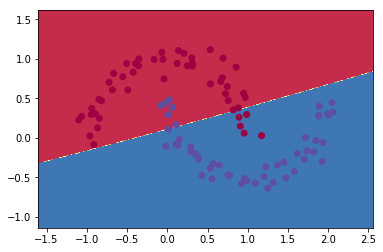

In [22]:
from sklearn import naive_bayes

clf = naive_bayes.GaussianNB()

train_report(clf,X_moons,y_moons)

In [23]:
clf.theta_ # mean per class

array([[ 0.01410712,  0.62033476],
       [ 0.98617269, -0.13453397]])

In [24]:
clf.sigma_ # variance per class

array([[0.50612806, 0.11260573],
       [0.52399596, 0.11092904]])

# Multiclass, Multilabel

- **Multiclass-Classifier:** A classifier is capable to select from more than one class
- **Multilabel-Classifier:** An example is assigned to one or more classes

Some algorithms are inherently multiclass. Otherwise, if possible, Scikit learn automatically extends the classifier to multiclass-labels, according to the following strategies. 

Multiclass problems can be decomposed into binary classification problems:

- "One vs. All" approach: One classifier per class trained against all other classes  
$k$ classifiers, each trained with the whole dataset
- "One vs. One" approach: A classifier is trained for every pair of classes. An example is assigned to the class that has won most often.  
$\frac{k * (k-1)}{2}$ classifiers, each trained on a subset of the data

See the [sklearn documentation](http://scikit-learn.org/stable/modules/multiclass.html) for details.

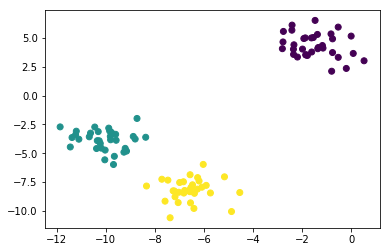

In [25]:
X_multi,y_multi = make_blobs(centers=3,random_state=1)
plt.scatter(X_multi[:,0],X_multi[:,1],c=y_multi)
plt.show()

accuracy: 1.0


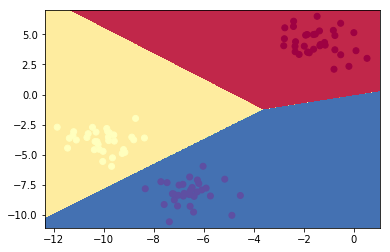

In [26]:
clf = LogisticRegression()

train_report(clf, X_multi, y_multi)

accuracy: 1.0


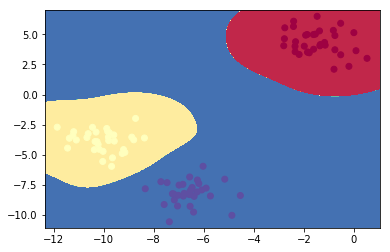

In [27]:
clf = svm.SVC()

train_report(clf, X_multi, y_multi)

accuracy: 1.0


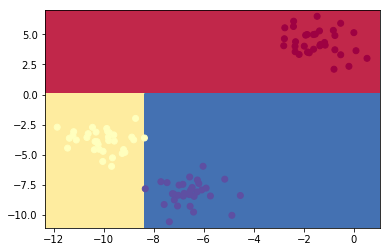

In [28]:
clf = tree.DecisionTreeClassifier()

train_report(clf, X_multi, y_multi)

/bin/sh: 1: dot: not found


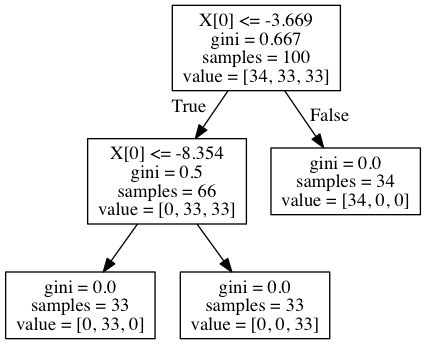

In [29]:
tree.export_graphviz(clf,out_file='dt3.dot')

!dot -Tpng dt3.dot -o dt3.png
Image("dt3.png")

# Text Classification
## Data Set
The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The data is organized into 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware / comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale / soc.religion.christian). Here is a list of the 20 newsgroups, partitioned (more or less) according to subject matter:




<table border=1>
<tr>
<td>comp.graphics<br>comp.os.ms-windows.misc<br>comp.sys.ibm.pc.hardware<br>comp.sys.mac.hardware<br>comp.windows.x</td>
<td>rec.autos<br>rec.motorcycles<br>rec.sport.baseball<br>rec.sport.hockey</td>
<td>sci.crypt<br>sci.electronics<br>sci.med<br>sci.space</td>
</tr><tr>
<td>misc.forsale</td>
<td>talk.politics.misc<br>talk.politics.guns<br>talk.politics.mideast</td>
<td>talk.religion.misc<br>alt.atheism<br>soc.religion.christian</td>
</tr>
</table>

The "bydate"-option is sorted by date into training(60%) and test(40%) sets, does not include cross-posts (duplicates) and does not (should not) include newsgroup-identifying headers (Xref, Newsgroups, Path, Followup-To, Date). 

In [30]:
# shell scripts for downloading the data and placing it in a corresponding directory
!mkdir newsgroups
!curl -o newsgroups/news.tar.gz "http://qwone.com/~jason/20Newsgroups/20news-bydate.tar.gz"
# extract the files
!gzip -d < newsgroups/news.tar.gz | tar xf - --directory newsgroups

mkdir: cannot create directory ‘newsgroups’: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.7M  100 13.7M    0     0  3782k      0  0:00:03  0:00:03 --:--:-- 3781k


Take a quick look at the data

In [ ]:
!ls newsgroups/
print('--------------------------------')
!ls newsgroups/20news-bydate-train/
print('--------------------------------')
!ls newsgroups/20news-bydate-train/alt.atheism/
print('--------------------------------')
!less newsgroups/20news-bydate-train/alt.atheism/49960

20news-bydate-test  20news-bydate-train  news.tar.gz
--------------------------------
alt.atheism		  rec.autos	      sci.space
comp.graphics		  rec.motorcycles     soc.religion.christian
comp.os.ms-windows.misc   rec.sport.baseball  talk.politics.guns
comp.sys.ibm.pc.hardware  rec.sport.hockey    talk.politics.mideast
comp.sys.mac.hardware	  sci.crypt	      talk.politics.misc
comp.windows.x		  sci.electronics     talk.religion.misc
misc.forsale		  sci.med
--------------------------------
49960  51164  51212  51258  51305  53094  53158  53210	53284  53439  53660
51060  51165  51213  51259  51306  53095  53159  53211	53285  53440  53661
51119  51169  51214  51260  51307  53096  53160  53212	53286  53441  53753
51120  51170  51215  51261  51308  53097  53161  53213	53287  53442  53754
51121  51171  51216  51262  51309  53098  53162  53214	53288  53443  53755
51122  51172  51217  51265  51310  53099  53163  53215	53289  53445  53756
51123  51173  51218  51266  51311  53106  53164  53216	53

Load the data using a scikit learn utility function, which loads text files with categories as subfolder names. The data has to have the following structure:
* container_folder/
  * category_1_folder/
    * file_1.txt
    * file_2.txt
    * ...
    * file_42.txt
  * category_2_folder/
    * file_43.txt
    * file_44.txt
    * ...

In [ ]:
from sklearn.datasets import load_files


twenty_train = load_files('./newsgroups/20news-bydate-train/', encoding='latin1')
twenty_test = load_files('./newsgroups/20news-bydate-test/', encoding='latin1')

In [ ]:
print(len(twenty_train.data))
print(twenty_train.target[0])
print(twenty_train.data[0])

## Preprocessing
### Transform the data into a bag-of-words (BOW) model

In [ ]:
from sklearn import feature_extraction

vectorizer = feature_extraction.text.CountVectorizer()
train_counts = vectorizer.fit_transform(twenty_train.data)
print(train_counts.shape)
print(train_counts[0])

### Transform raw counts to tf-idf scores

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
X_train = transformer.fit_transform(train_counts)

print(X_train[0])

### Classify

In [ ]:
clf = naive_bayes.MultinomialNB()

clf.fit(X_train,twenty_train.target)
clf.score(transformer.transform(vectorizer.transform(twenty_test.data)),twenty_test.target)

### Put together in a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

clf = Pipeline([('vect', feature_extraction.text.CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', naive_bayes.MultinomialNB()),
               ])

clf.fit(twenty_train.data,twenty_train.target)
clf.score(twenty_test.data,twenty_test.target)

### Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1.0, 0.1),
             }

gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf.fit(twenty_train.data, twenty_train.target)
pred = gs_clf.predict(twenty_test.data)
print('accuracy',metrics.accuracy_score(twenty_test.target,pred))

for param_name in sorted(parameters.keys()):
    print(param_name,":", gs_clf.best_params_[param_name])

In [ ]:
# do the same, but with a SVM instead of NB
from sklearn.linear_model import SGDClassifier

clf = Pipeline([('vect', feature_extraction.text.CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42)),
               ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-2, 1e-3),
             }

gs_clf = GridSearchCV(clf, parameters, n_jobs=-1)
gs_clf.fit(twenty_train.data, twenty_train.target)
pred = gs_clf.predict(twenty_test.data)
print('accuracy',metrics.accuracy_score(twenty_test.target,pred))

for param_name in sorted(parameters.keys()):
    print(param_name,":", gs_clf.best_params_[param_name])

Grid Search is a brute force approach, testing all hyperparameter combinations. This may be to costly. As an alternative, you might consider [Random Search](http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search) or more sophisticated methods, such as [Bayesian Optimization](https://github.com/fmfn/BayesianOptimization).

If your data does not fit into memory, you need to use a classifier, which can be trained incrementally. See [Scaling Strategies](http://scikit-learn.org/stable/modules/scaling_strategies.html) for an overview and [Out-of-core classification of text documents](http://scikit-learn.org/stable/auto_examples/applications/plot_out_of_core_classification.html) for an example.